# Illinois Climate Network - plot data

The Illinois State Water Survey provides historical daily data from 19 stations across Illinois.

Link:
https://www.isws.illinois.edu/warm/datatype.asp


Use this notebook to plot the data from each station.

In [1]:
%pylab inline
import pandas as pd
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

Set the path where the downloaded files can be found.

In [3]:
path_data = '../../Data/Illinois_Climate_Network'

In [4]:
os.listdir(path_data)

['BBCDAY.txt',
 'BRWDAY.txt',
 'BVLDAY.txt',
 'CMIDAY.txt',
 'DEKDAY.txt',
 'DXSDAY.txt',
 'FAIDAY.txt',
 'FREDAY.txt',
 'FRMDAY.txt',
 'ICCDAY.txt',
 'LLCDAY.txt',
 'MONDAY.txt',
 'OLNDAY.txt',
 'ORRDAY.txt',
 'RNDDAY.txt',
 'sfmday.txt',
 'SIUDAY.txt',
 'SNIDAY.txt',
 'STCDAY.txt',
 'STEDAY.txt',
 'WFPDAY.txt',
 'WFPDAYBBCDAY.txt']

Select a station to be plotted. In this example, the Monmouth station is plotted (file name 'MONDAY.txt'). Read the CSV file into a pandas dataframe.

In [6]:
df_stn = pd.read_csv(os.path.join(path_data,'MONDAY.txt'), sep='\t', header=0, skipfooter=11, engine='python',skiprows=[1])

Filter the dataset by year and month. Here we look at April 2013.

In [7]:
df_stn_month = df_stn.loc[(df_stn.year==2013) & (df_stn.month==4)]

Select the precipitation column and convert the values to numeric. Use `coerce` to force the non-numeric values to be NaN.

In [8]:
precip_stn = pd.to_numeric(df_stn_month['precip'].values,errors='coerce')

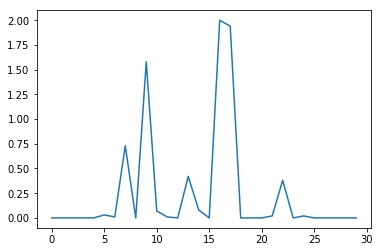

In [9]:
plt.plot(precip_stn)

In the next lines we want to plot each station and save it as a separate figure file.

C:\Users\irene\Anaconda3\envs\wradlib3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


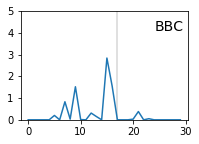

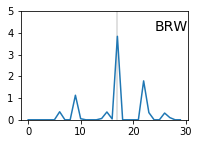

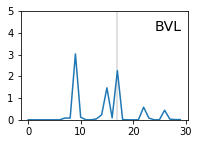

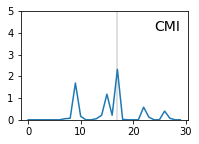

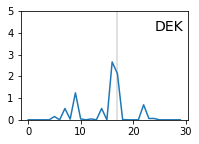

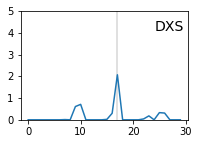

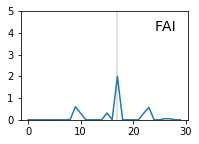

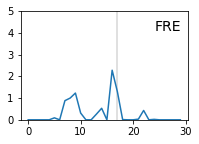

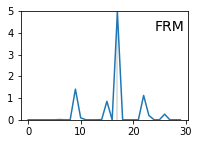

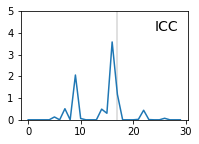

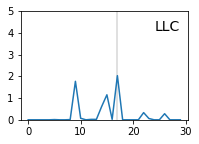

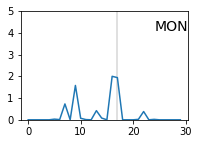

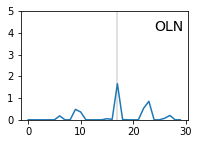

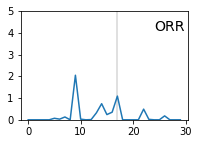

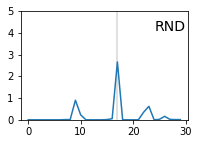

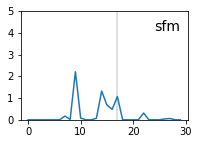

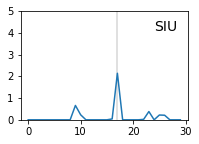

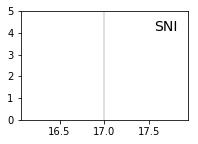

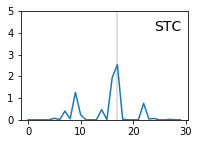

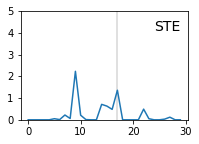

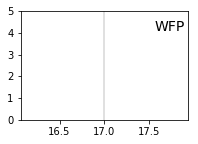

In [10]:

for i,stn in enumerate(os.listdir(path_data)):
    # skip WFP/BBC transition station
    if stn=='WFPDAYBBCDAY.txt':
        continue
    df_stn = pd.read_csv(os.path.join(path_data,stn), sep='\t', header=0, skipfooter=11, engine='python',skiprows=[1])
    df_stn_month = df_stn.loc[(df_stn.year==2013) & (df_stn.month==4)]
    precip_stn = pd.to_numeric(df_stn_month['precip'].values,errors='coerce')
    plt.figure(figsize=(3,2))
    plt.ylim(0,5)
    plt.annotate(stn[:3],xy=(0.8,0.82), xycoords='axes fraction', fontsize=14)
    plt.axvline(x=17, lw=0.4, color='0.4')
    
    plt.plot(precip_stn)
    plt.savefig(stn[:3]+'.png')